In [5]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"

In [7]:
df = pd.read_csv("Competition_Data.csv")

In [9]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [13]:
df.isna().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

checking distribution between price and competition price

In [15]:
import matplotlib.pyplot as plt

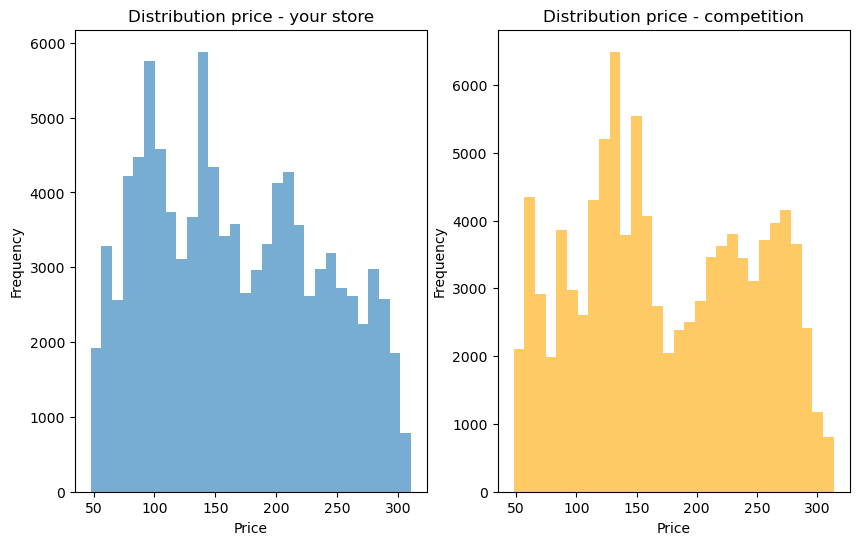

In [25]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.hist(df['Price'],bins=30,alpha=0.6)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Distribution price - your store")

plt.subplot(1,2,2)
plt.hist(df['Competition_Price'],bins=30,alpha=0.6,color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution price - competition')

plt.show()

It shows that the competiton price are generally heigher ,which peaks around 100 to 150 and 250 to 300 which indecates the higher prices.
our's stores prices are evenely distributied accross 50 to 300 ,which peaks at 100 to 150 

checking reltionship between price and sales

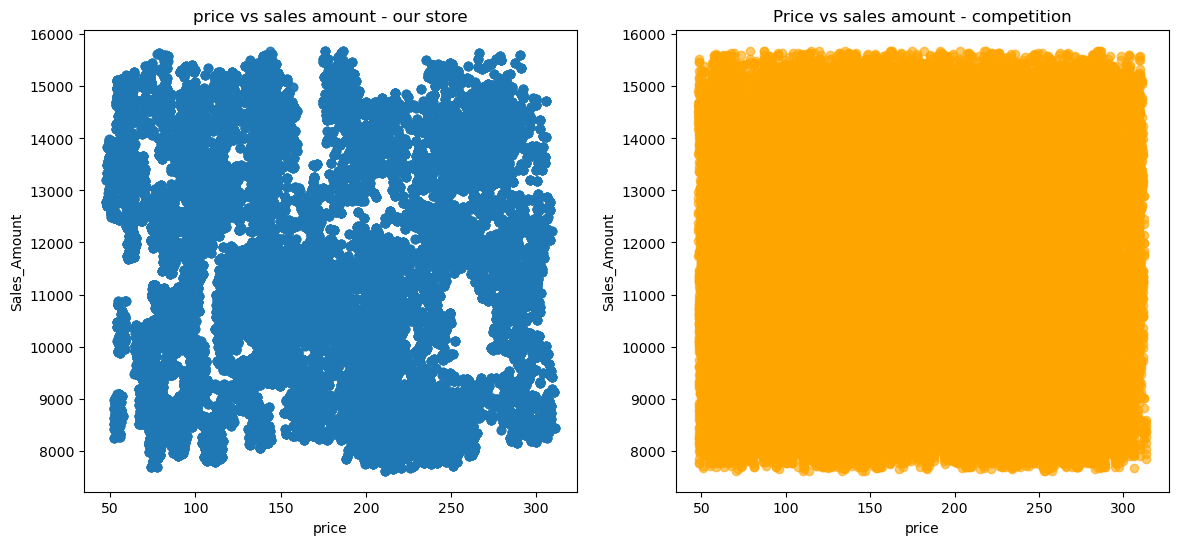

In [29]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df['Price'],df['Sales_Amount'],alpha=0.6)
plt.xlabel("price")
plt.ylabel("Sales_Amount")
plt.title("price vs sales amount - our store")

plt.subplot(1,2,2)
plt.scatter(df['Competition_Price'],df['Sales_Amount'],color='orange',alpha=0.6)
plt.xlabel("price")
plt.ylabel("Sales_Amount")
plt.title("Price vs sales amount - competition")

plt.show()

This plot compares the relationship between price and sales amount for our store and the competition price. For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend.But in the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but has a more consistent sales performance.
It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

 compare price over time

In [47]:
df['Fiscal_Week_ID'] = pd.to_datetime(df['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

In [58]:
weekly_prcing = df.groupby('Fiscal_Week_ID').agg({
    'Price' : 'mean',
    'Competition_Price' : 'mean'
}).reset_index()

In [59]:
weekly_prcing

,Fiscal_Week_ID,Price,Competition_Price
0,2019-03-18,166.352333,175.018236
1,2019-03-25,166.486184,173.169854
2,2019-04-01,169.865254,173.161543
3,2019-04-08,164.892479,174.914615
4,2019-04-15,167.455556,175.189035


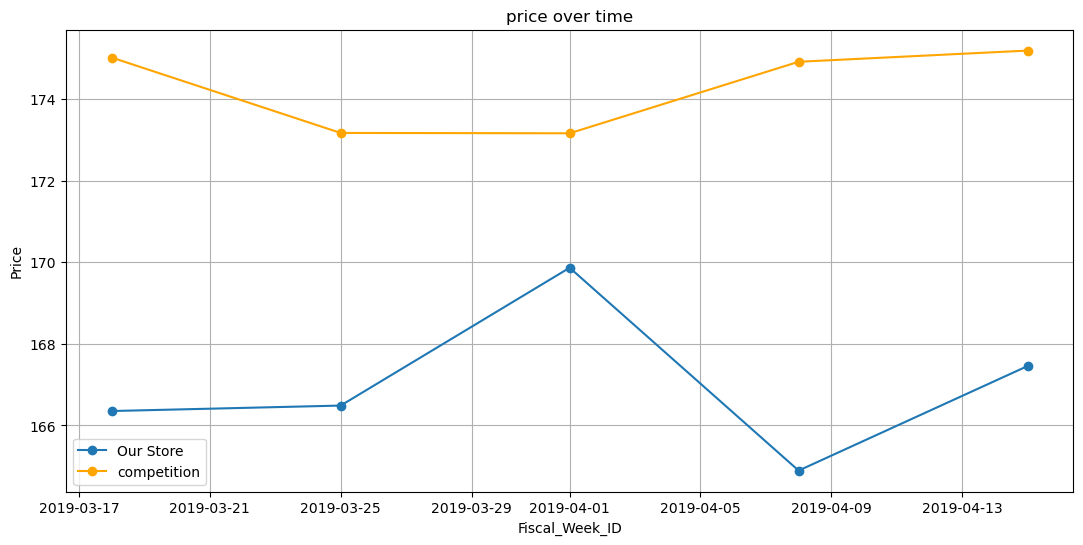

In [62]:
plt.figure(figsize=(13,6))

plt.plot(weekly_prcing['Fiscal_Week_ID'],weekly_prcing['Price'],marker='o',label="Our Store")
plt.plot(weekly_prcing['Fiscal_Week_ID'],weekly_prcing['Competition_Price'],marker='o',color='orange',label="competition")
plt.xlabel("Fiscal_Week_ID")
plt.ylabel("Price")

plt.title("price over time")
plt.legend()
plt.grid(True)
plt.show()

The competiton price are consistantly above 170 and have a slighlty upward trend over some weeks ,where as our store price start at 160 and increases slighlty then dip agian before raising .This indicates that the competiton price follows a stable pricing statergy while our store has more flututation in pricing.The stability in competiton pricing could be contributing the higher and more consistent sales 

In [78]:
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# Enable MLflow's automatic experiment tracking for scikit-learn
mlflow.sklearn.autolog()

# Load the training dataset
db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)
# MLflow triggers logging automatically upon model fitting
rf.fit(X_train, y_train)

2025/01/17 17:47:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '07d13333b666416e8b5ba88caa96913e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


RandomForestRegressor(max_depth=6, max_features=3)